**Day 34 – Advanced Regression and Model Evaluation**

Welcome to **Day 34** of the statistics for machine learning series!

In this notebook, we focus on some of the most important and practical topics in advanced statistics — especially for machine learning applications:

- **Hypothesis Testing** – How to test assumptions with data  
- **Type I and Type II Errors** – Understanding errors in decision-making  
- **P-value and Significance** – How to decide when a result is meaningful  
- **Linear Regression with Statistical Understanding** – Not just how to fit a line, but how to interpret it  
- **ANOVA (Analysis of Variance)** – Breaking down variability using SSR, SSE, and SST  
- **Regression Table Interpretation** – Reading output from `statsmodels` to assess model strength

These tools not only help us build better predictive models but also explain **why** a model works (or doesn't). Understanding these concepts is essential before jumping into more complex ML algorithms.

By the end of this notebook, you’ll be able to:
- Build and evaluate multiple regression models
- Understand and calculate error metrics
- Interpret full regression output with confidence

Let’s dive in and build some statistical muscle


# Hypothesis Testing

## What is Hypothesis Testing?

Hypothesis testing is a statistical method used to make decisions or judgments about a population based on a sample.

We **start with a claim** (called a **null hypothesis**, H0) and test whether we should keep or reject it based on sample data.



## Real-Life Example:

Suppose a juice company claims that their bottles contain **500ml** of juice on average.

You suspect they might be underfilling. So you collect a sample of bottles and check whether there's enough **evidence to reject their claim**.


## Step-by-Step Manual Solution

Let’s say you measured the volume (in ml) of 10 random juice bottles:

**Data**:  
`[495, 498, 499, 502, 500, 496, 493, 497, 501, 494]`



### Set Hypotheses

- **H0 (Null Hypothesis)**: The average volume is 500ml (μ = 500)  
- **H1 (Alternative Hypothesis)**: The average volume is not 500ml (μ ≠ 500)

This is a **two-tailed test** because we are checking for "different", not "greater" or "less".



### Calculate Sample Statistics

- Sample size (n) = 10  
- Sample mean (x̄) = 497.5  
- Sample standard deviation (s) ≈ 2.95  
- Population mean (μ) = 500



###  Calculate the t-statistic

Use this formula:

```

t = (x̄ - μ) / (s / √n)

```

Substitute values:

```

t = (497.5 - 500) / (2.95 / √10) ≈ -2.67

```



### Find the critical t-value

For 95% confidence and 9 degrees of freedom (n - 1 = 9), the **t-critical value** ≈ ±2.262


### Compare

Since -2.67 < -2.262 → **Reject H0**

Conclusion: There is evidence that the bottles do **not** contain 500ml on average.


In [1]:
# Python Code to Perform the Test

from scipy import stats
import numpy as np

# Step 1: Sample data
sample = [495, 498, 499, 502, 500, 496, 493, 497, 501, 494]

# Step 2: Perform t-test
t_stat, p_val = stats.ttest_1samp(sample, 500)

# Step 3: Print results
print("Sample Mean:", np.mean(sample))
print("T-statistic:", round(t_stat, 3))
print("P-value:", round(p_val, 4))

# Step 4: Decision
alpha = 0.05
if p_val < alpha:
    print(" Result: Reject H0 → Bottles are not 500ml on average")
else:
    print(" Result: Fail to Reject H0 → No strong evidence against 500ml claim")


Sample Mean: 497.5
T-statistic: -2.611
P-value: 0.0282
 Result: Reject H0 → Bottles are not 500ml on average


## Summary

- Hypothesis testing helps us decide whether to accept or reject a claim based on sample data.
- We use a **t-test** when sample size is small and population standard deviation is unknown.
- A **low p-value (< 0.05)** means we **reject the null hypothesis**.
- This is how we bring real-world doubt to data-driven decisions!

This method is commonly used in:
- Product quality testing  
- Medicine (testing if a drug works)  
- A/B Testing (marketing and web experiments)

# Type I and Type II Errors (with Confusion Matrix in ML)



## What Are Type I and Type II Errors?

In hypothesis testing or classification problems, we often make two kinds of mistakes:

- **Type I Error (False Positive)**: You rejected the null hypothesis, but it was actually true.
- **Type II Error (False Negative)**: You failed to reject the null hypothesis, but it was actually false.



##  In Machine Learning: Classification

When we build a **classification model** (e.g., predicting spam vs not spam), these errors appear inside the **confusion matrix**.



## What is a Confusion Matrix?

The confusion matrix is a 2x2 table used to evaluate classification models.

|               | Predicted Positive | Predicted Negative |
|---------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP)    | False Negative (FN) |
| **Actual Negative** | False Positive (FP)   | True Negative (TN)  |



##  Relating to Errors:

- **Type I Error = False Positive (FP)**  
  → You predicted positive, but it's actually negative.  
  → Example: A healthy person diagnosed with disease

- **Type II Error = False Negative (FN)**  
  → You predicted negative, but it's actually positive.  
  → Example: A sick person diagnosed as healthy


## Real-World Example: COVID Test

| Person Status | Test Result        | Meaning                |
|---------------|--------------------|------------------------|
| Sick          | Positive (TP)      | Correct detection      |
| Sick          | Negative (FN)      | **Type II Error** (missed case)  
| Healthy       | Positive (FP)      | **Type I Error** (false alarm)  
| Healthy       | Negative (TN)      | Correct rejection      |


In [2]:
# Python Code Example: Confusion Matrix and Error Counts


from sklearn.metrics import confusion_matrix

# True values (actual class labels)
y_true = [1, 0, 1, 1, 0, 1, 0]

# Predicted values from the model
y_pred = [1, 1, 1, 0, 0, 1, 0]

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Extract values
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
TN = cm[0, 0]

# Print matrix and error types
print("Confusion Matrix:")
print(cm)
print("\nTrue Positives (TP):", TP)
print("False Negatives (FN):", FN, "← Type II Error")
print("False Positives (FP):", FP, "← Type I Error")
print("True Negatives (TN):", TN)

Confusion Matrix:
[[2 1]
 [1 3]]

True Positives (TP): 3
False Negatives (FN): 1 ← Type II Error
False Positives (FP): 1 ← Type I Error
True Negatives (TN): 2


## Summary

* **Type I Error = False Positive (FP)**

  * You wrongly predicted **positive**
  * Serious in medical diagnosis (healthy flagged as sick)

* **Type II Error = False Negative (FN)**

  * You wrongly predicted **negative**
  * More dangerous in critical systems (missed a real case)



## Bonus Tip: When to Worry About Which?

* In **medicine**: Type II is worse (missing a sick patient)
* In **spam detection**: Type I is worse (important email goes to spam)
* In **fraud detection**: Type II is worse (you miss a fraud)

Always adjust your model to minimize the more **costly error** based on real-world consequences.

## Note:

In machine learning, especially in classification problems, Type I and Type II errors are part of a tool called the **confusion matrix**.

The confusion matrix is a 2x2 table that shows how many predictions were correct and how many were wrong — and it helps us calculate important metrics like **accuracy**, **precision**, **recall**, and **F1-score**.

We will study the **confusion matrix in detail later** when we learn about classification models in machine learning.


#  P-Value and Significance


## What is a P-Value?

The **p-value** is a number that tells us how likely it is to get the result we observed, or something more extreme, **if the null hypothesis (H0) were true**.

In simple words:  
> P-value helps us decide whether to believe or doubt the claim (null hypothesis).


##  Rule of Thumb

- If **p < 0.05** → **Reject H0** → Result is **statistically significant**
- If **p ≥ 0.05** → **Fail to reject H0** → No strong evidence against H0



## Real-World Example

A new medicine claims to reduce blood pressure more than the standard one.

- You give the new medicine to 30 people.
- You measure the average reduction.
- You perform a test and get **p = 0.03**

**Interpretation**:  
- Since p = 0.03 < 0.05 → You **reject H0**  
- You have enough evidence to say the new medicine **works better**.


## Manual Concept (How P-Value Works)

Let’s say we test if a sample of bottles contains 500ml of juice on average.

- H0: μ = 500ml  
- H1: μ ≠ 500ml  
- After performing a t-test, you get **p = 0.042**

Now compare:
- If your alpha (significance level) is 0.05  
- Since **0.042 < 0.05**, you **reject H0**

This means the average is likely **not** 500ml.


In [3]:
# Python Example Using Scipy

# Let’s use the same juice bottle data again.

from scipy import stats

# Sample data (juice bottle volumes)
sample = [495, 498, 499, 502, 500, 496, 493, 497, 501, 494]

# Perform one-sample t-test
t_stat, p_val = stats.ttest_1samp(sample, 500)

print("T-statistic:", round(t_stat, 3))
print("P-value:", round(p_val, 4))

# Decision based on p-value
alpha = 0.05
if p_val < alpha:
    print(" Reject H0 → Juice volume is statistically different from 500ml")
else:
    print(" Fail to Reject H0 → No strong evidence against 500ml claim")

T-statistic: -2.611
P-value: 0.0282
 Reject H0 → Juice volume is statistically different from 500ml


## Summary

* P-value tells us **how surprising** the data is **if H0 is true**
* It is used to decide whether to reject H0
* Common thresholds: 0.05 (95% confidence), 0.01 (99%)

**Lower p-value → stronger evidence** against the null hypothesis


## Tip:

P-value is not the probability that H0 is true.
It’s the probability of seeing your result **if** H0 is true.

# Linear Regression 

## What is Linear Regression?

**Linear regression** is a statistical method to model the relationship between a **dependent variable (Y)** and an **independent variable (X)** using a straight line.

The goal is to **predict values of Y** based on X.


## Formula:

```

Y = mX + c

````

Where:
- Y = dependent (target) variable  
- X = independent (input) variable  
- m = slope of the line (how much Y changes with X)  
- c = intercept (Y value when X = 0)


## Real-Life Example

A teacher wants to predict **exam scores** based on the number of **hours studied**.

| Hours Studied | Score |
|---------------|-------|
| 1             | 50    |
| 2             | 55    |
| 3             | 65    |
| 4             | 70    |
| 5             | 75    |

Can we draw a line that shows how score changes with study hours?


##  Manual Steps

1. Plot the data points  
2. Fit a straight line (best fit)  
3. Use the formula Y = mX + c  
4. Predict new values using the line


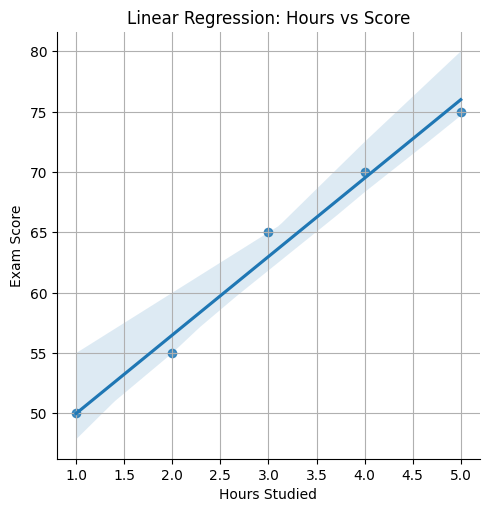

In [4]:
# Python Implementation (with Seaborn Plot)


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'Hours': [1, 2, 3, 4, 5],
    'Score': [50, 55, 65, 70, 75]
}
df = pd.DataFrame(data)

# Regression plot
sns.lmplot(x='Hours', y='Score', data=df)
plt.title("Linear Regression: Hours vs Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()


## Interpretation:

* The line shows the **trend** between Hours and Score.
* We can now **predict scores** for new values of hours (e.g., 6 hours).


## Summary:

* Linear regression finds a line that best fits the data.
* Useful for **prediction**, **trend analysis**, and **feature relationships**.
* The fit can be evaluated using **MSE, MAE, RMSE, and R²**, which we’ll cover next.


# Multiple Linear Regression

## What is Multiple Linear Regression?
Multiple Linear Regression is used when we want to predict a target variable using **two or more independent variables**.

## Formula:
```

Y = b0 + b1*X1 + b2*X2 + ... + bn\*Xn

````

## Real-Life Example:
Predicting **house prices** using:
- Area (sqft)
- Number of Bedrooms
- Age of the house


In [5]:
# Python Code:

import pandas as pd
from sklearn.linear_model import LinearRegression

# Create dataset
data = {
    'Area': [1000, 1500, 1700, 1300, 1600],
    'Bedrooms': [2, 3, 3, 2, 3],
    'Age': [10, 5, 3, 8, 4],
    'Price': [300000, 400000, 420000, 330000, 410000]
}

df = pd.DataFrame(data)
X = df[['Area', 'Bedrooms', 'Age']]
y = df['Price']

# Train model
model = LinearRegression()
model.fit(X, y)

# Display results
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 100000.00000000047
Coefficients: [ 1.00000000e+02  5.00000000e+04 -1.45519152e-11]


## Evaluation Metrics (MSE, MAE, RMSE, R²)  

### Evaluation Metrics for Regression

###  Why Metrics Matter
After training a regression model, we measure how well it predicts. These are the most common metrics:

| Metric | What it Measures | Notes |
|--------|------------------|-------|
| **MAE** | Mean Absolute Error | Average of absolute errors |
| **MSE** | Mean Squared Error | Penalizes large errors more |
| **RMSE** | Root Mean Squared Error | Same units as target |
| **R²** | Coefficient of Determination | How well model explains the data (0 to 1) |


In [6]:
# Python Code:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict using model
predicted = model.predict(X)
actual = y  # from earlier

# Calculate metrics
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(actual, predicted)

# Print metrics
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 3))

MAE: 0.0
MSE: 0.0
RMSE: 0.0
R² Score: 1.0


## Regression Table (with `statsmodels`)  


###  Why Use statsmodels?

`statsmodels` gives you a full regression output with:

* Coefficients
* Standard errors
* t-values
* p-values
* R-squared
* Confidence intervals

This helps in **interpreting the importance** and **reliability of predictors**.


### Key Terms in the Output:

| Term            | Meaning                                                          |   |                                                                |
| --------------- | ---------------------------------------------------------------- | - | -------------------------------------------------------------- |
| coef            | Change in Y for one-unit increase in X                           |   |                                                                |
| std err         | Standard error of the estimate                                   |   |                                                                |
| t               | t-statistic for hypothesis testing                               |   |                                                                |
| P>              | t                                                                |   | p-value — if < 0.05, the variable is statistically significant |
| \[0.025, 0.975] | 95% confidence interval for the coefficient                      |   |                                                                |
| R-squared       | How well the model explains the variance (closer to 1 is better) |   |                                                                |


In [9]:
! pip install statsmodels

^C


In [11]:
# Python Code:

import statsmodels.api as sm

# Add constant to X for intercept
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()

# Show full regression summary
print(model_sm.summary())

ModuleNotFoundError: No module named 'statsmodels'

### How to Read the Output:

* **coef**: Effect of each feature on the target
* **P>|t|**: Probability that the coefficient is zero (if p < 0.05, it's significant)
* **R-squared**: Percentage of variance explained (closer to 1 is better)
* **\[0.025, 0.975]**: 95% confidence interval for each coefficient

# ANOVA: SSR, SSE, SST in Regression

## What is ANOVA in Regression?

ANOVA (Analysis of Variance) in regression helps us **understand how much of the variation** in the dependent variable is **explained by the model** and how much is **left as error**.


##  Components:

- **SST (Total Sum of Squares)**: Total variation in the dependent variable  
- **SSR (Regression Sum of Squares)**: Variation explained by the regression model  
- **SSE (Error Sum of Squares)**: Variation not explained (residual/error)

Relationship:
```

SST = SSR + SSE

````


## Real-Life Example:

Imagine you're predicting house prices. ANOVA tells you:
- How much of the price difference is explained by your model (SSR)
- How much is still unexplained error (SSE)


In [10]:
# Python Example:
import numpy as np

# Actual and predicted values
actual = np.array([300000, 400000, 420000, 330000, 410000])
predicted = model.predict(X)

# SST: Total Sum of Squares
sst = np.sum((actual - np.mean(actual))**2)

# SSE: Error Sum of Squares
sse = np.sum((actual - predicted)**2)

# SSR: Regression Sum of Squares
ssr = sst - sse

print("SST (Total):", round(sst, 2))
print("SSR (Explained):", round(ssr, 2))
print("SSE (Unexplained):", round(sse, 2))
print("Check: SST = SSR + SSE →", round(ssr + sse, 2))

SST (Total): 11480000000.0
SSR (Explained): 11480000000.0
SSE (Unexplained): 0.0
Check: SST = SSR + SSE → 11480000000.0


# Final Wrap-up

In this notebook, we have covered almost all the **important statistics concepts** required for understanding and applying machine learning — from basic ideas like hypothesis testing to **advanced regression analysis**, ANOVA, and model evaluation metrics.

Today, we focused especially on the **advanced elements** like multiple regression, model diagnostics, and interpreting statistical outputs — which are often skipped but are **crucial for serious ML practice**.

Some additional statistical concepts (like advanced probability, chi-square, or specific ML-focused techniques) will be covered **while we apply machine learning algorithms in practice**.

You’re now well-prepared to move forward with ML projects, confident in the statistical foundation behind them!
